Fitted parameters:
B1 = 0.9556686505286647
B2 = -0.5209194760069012
B3 = 50815.706032126596
B4 = -5435.579792132445
B5 = 139.5032891264284


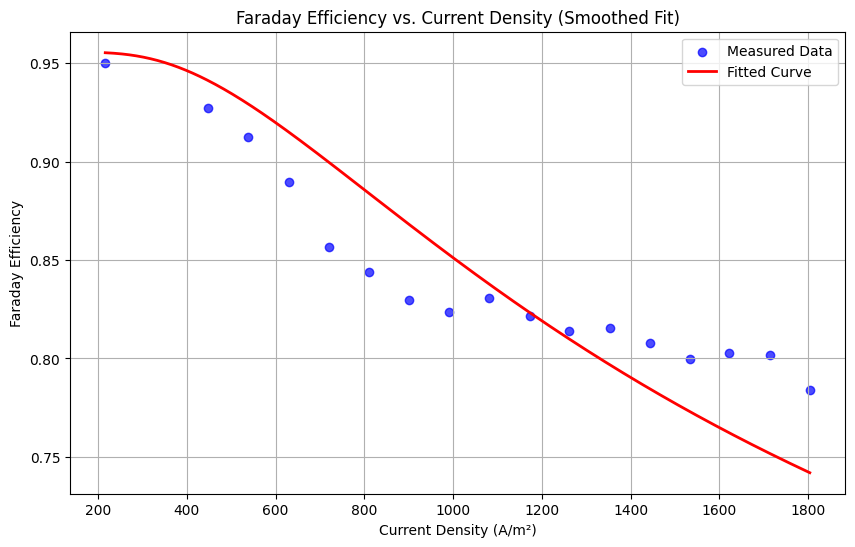

In [7]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Load the Excel file (replace with the path to your local file)
file_path = 'C:\\Users\\User\\Desktop\\Internship\\Real Results\\Book1.xlsx'
data = pd.read_excel(file_path)

# Rename columns for ease of access (based on the structure you provided)
data.columns = [
    "Power_Level", "Voltage", "Current", "Surface_Area_Membrane", "Hydrogen_Volume_Flow", 
    "Valve_Output", "Temperature", "Pressure", "Voltage_Cell", "Current_Density",
    "Current_Cell", "Real_Hydrogen_Volume_Flow", "Real_Hydrogen_Mass_Flow", "Hydrogen_Flow_g_s",
    "Real_Hydrogen_Flow_mol_s", "Voltage_Efficiency", "Faraday_Efficiency_Provided", "Cell_Efficiency", 
    "Power", "Overall_Efficiency"
]

# Drop the header row and reset index
data = data.drop(0).reset_index(drop=True)

# Convert necessary columns to numeric data types
data["Current"] = pd.to_numeric(data["Current"], errors="coerce")
data["Surface_Area_Membrane"] = pd.to_numeric(data["Surface_Area_Membrane"], errors="coerce")
data["Temperature"] = pd.to_numeric(data["Temperature"], errors="coerce")
data["Real_Hydrogen_Volume_Flow"] = pd.to_numeric(data["Real_Hydrogen_Volume_Flow"], errors="coerce")

# Step 1: Calculate Current Density (I / A)
data["Current_Density"] = data["Current"] / data["Surface_Area_Membrane"]

# Define the model function for Faraday Efficiency
def faraday_efficiency_model(vars, B1, B2, B3, B4, B5):
    iel, T = vars
    return B1 + B2 * np.exp((B3 + B4 * T + B5 * T**2) / iel)

# Prepare the data for fitting
current_density = data["Current_Density"].values
temperature = data["Temperature"].values
faraday_efficiency = pd.to_numeric(data["Faraday_Efficiency_Provided"], errors="coerce").values  # Measured efficiency

# Combine current density and temperature for curve fitting
variables = (current_density, temperature)

# Initial guess for parameters
initial_guess = [1.0, 1.0, 1.0, 1.0, 1.0]

# Perform curve fitting
params, covariance = curve_fit(faraday_efficiency_model, variables, faraday_efficiency, p0=initial_guess)

# Extract fitted parameters
B1, B2, B3, B4, B5 = params
print(f"Fitted parameters:\nB1 = {B1}\nB2 = {B2}\nB3 = {B3}\nB4 = {B4}\nB5 = {B5}")

# Create a smooth range of current densities (for smooth curve)
current_density_smooth = np.linspace(min(current_density), max(current_density), 500)

# For each value of current_density_smooth, calculate the corresponding Faraday Efficiency
# We need to interpolate temperature values because the model depends on both current density and temperature
# One way to handle this is to assume a constant temperature or interpolate based on the data.
# Let's assume we take the mean temperature across all data points as a simple approach.

mean_temperature = np.mean(temperature)

# Calculate the Faraday efficiency for the smooth current density values at the mean temperature
fitted_efficiency_smooth = faraday_efficiency_model((current_density_smooth, np.full_like(current_density_smooth, mean_temperature)),
                                                     *params)

# Plotting the data and the smooth fit
plt.figure(figsize=(10, 6))

# Plot the actual data points (Current Density vs. Faraday Efficiency)
plt.scatter(current_density, faraday_efficiency, color='blue', label='Measured Data', alpha=0.7)

# Plot the smooth fitted curve (Current Density vs. Faraday Efficiency)
plt.plot(current_density_smooth, fitted_efficiency_smooth, color='red', label='Fitted Curve', linewidth=2)

# Labeling the axes and the plot
plt.xlabel('Current Density (A/m²)')
plt.ylabel('Faraday Efficiency')
plt.title('Faraday Efficiency vs. Current Density (Smoothed Fit)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
